In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [85]:
#set parameters
nx = 41
L = 2.0
dx = L / (nx - 1)
nt = 25 #number of time steps
dt = 0.01
c = 1.0

x = np.linspace(0.0, L, num=nx)

In [86]:
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [87]:
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


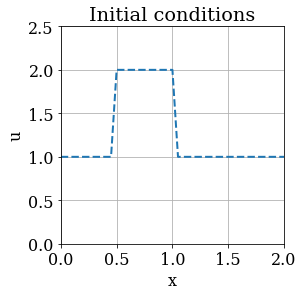

In [88]:
# Plot the initial conditions.
plt.figure(figsize=(4.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, color='C0', linestyle='--', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 2.5);

In [89]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

In [90]:
# Plot the solution after nt time steps
# along with the initial conditions.
def plot_figure(x, u0, u):
    plt.figure(figsize=(4.0, 4.0))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
    plt.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
    plt.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
    plt.legend()
    plt.xlim(0.0, L)
    plt.ylim(0.0, 2.5);

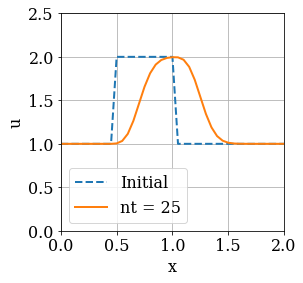

In [91]:
plot_figure(x, u0, u)

# 1D Non-Linear Covnection

In [103]:
u2 = u0.copy()
for n in range(1, nt):
    un = u2.copy()
    for i in range(1, nx):
        u2[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])

nt_2 = nt*2
u2b = u0.copy()
for n in range(1, nt_2):
    un = u2b.copy()
    for i in range(1, nx):
        u2b[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
    
dt_2 = dt/10
u2c = u0.copy()
for n in range(1, nt):
    un = u2c.copy()
    for i in range(1, nx):
        u2c[i] = un[i] - un[i] * dt_2 / dx * (un[i] - un[i - 1])
        
u2d = u0.copy()
for n in range(1, nt_2):
    un = u2c.copy()
    for i in range(1, nx):
        u2d[i] = un[i] - un[i] * dt_2 / dx * (un[i] - un[i - 1])

Top: nt = 25. dt=0.01 /// Middle-top:nt=50, dt=0.01 
Middle-Bottom:nt=25, dt=0.001 /// Bottom:nt=50, dt=0.001


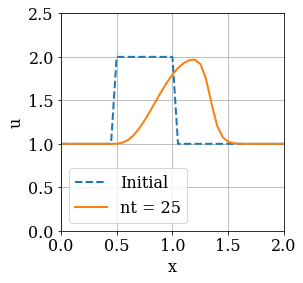

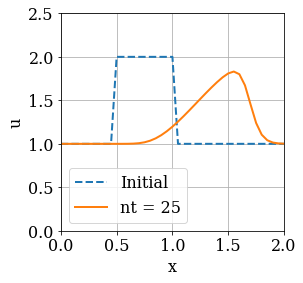

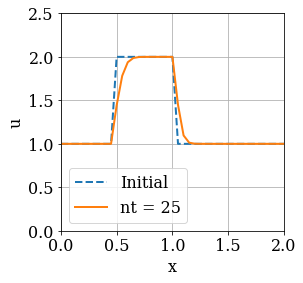

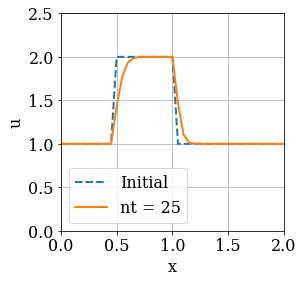

In [106]:
plot_figure(x, u0, u2)
print("Top: nt = 25. dt=0.01 /// Middle-top:nt=50, dt=0.01 ")
print("Middle-Bottom:nt=25, dt=0.001 /// Bottom:nt=50, dt=0.001")
plot_figure(x, u0, u2b)
plot_figure(x, u0, u2c)
plot_figure(x, u0, u2d)

In [115]:
# Compute the solution using Euler's method and array slicing.
u3 = u0.copy()
for n in range(1, nt*2):
    u3[1:] = u3[1:] - dt*1.1 / dx * u3[1:] * (u3[1:] - u3[:-1])

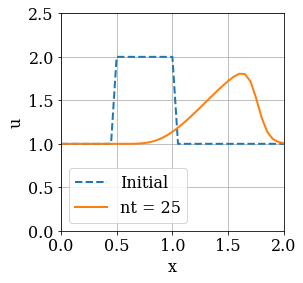

In [116]:
plot_figure(x, u0, u3)